# Examen Data Science & AI

| | |
| :--- | :--- |
| **Examenreeks** | Voorbeeldexamen |
| **Student:** | VUL HIER JE NAAM IN |
| **Studentennummer:** | VUL HIER JE STUDENTENNUMMER IN |
| **Datum & uur:** | EXAMENDATUM, STARTUUR |
| **Klasgroep:** | VUL HIER JE KLASGROEP IN |
| **IOEM-student:** | NEE |

Add code cells where necessary to work out the questions.  
**Please note that the contents of the code blocks are not considered as answers! Only what you write in the Markdown cells provided, counts as an answer! The contents of the code blocks only serve to substantiate your answer, so that we can see what you did to get your answer should it not match the expected outcome.

!! The exam will be in dutch for all students not enrolled in the IC !!

In [1]:
# Importeren van de nodige packages
# Vul zelf aan met extra packages als dit nodig is voor de oefeningen!
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Enkel relevant voor Google Colab:
# Als je VS Code gebruikt, kan je deze cel verwijderen of in commentaar zetten.
from google.colab import drive
drive.mount('/content/gdrive')

## Question 1

Suppose we have a dataset containing log data from a web server. Each row contains information from an HTTP request sent to the server, including the following information:

1. Timestamp of the HTTP request (in Unix time, number of seconds since 1970-01-01)
2. The type of HTTP request (GET, PUT, HEAD, DELETE, ...)
3. Response time (in ms)
4. The status of the response (2xx, 4xx, 5xx, ...)

What is the measurement level of each of these variables?

## Answers Question 1


1.  Kwantitatief, interval ( je kan niet zeggen het is 2* een ander tijdstip)
2.  Kwalitief,nominaal
3.  Kwantitatief, ratio
4.  Kwalitief, nominaal

## Question 2

For a survey in a school with 100 boys and 100 girls, the following method is used to form a sample:

- All boys and girls are sorted into two rows according to their height
- A coin is tossed
    - With cross, the first boy from the boys' row is chosen
    - At coin, the first girl is chosen from the girls' row.
- This is repeated until 10 pupils are selected.

<hr/>

1. Is this a random sample? Explain.
2. What type of error is being made here?
3. Is this a good sample? Explain.

## Answers Question 2

1.Nee, er kunnen bijv allemaal jongens gekozen worden, of allemaal grote meisjes

2.Accidental sampling error
3.nee, is niet random

## Question 3

In a basket are seven fruits, 4 oranges and 3 lemons. You take ...

(1) just one fruit. What is the probability that this is an orange?  
(2) one fruit and then another without putting the first one back. What is the probability that the two fruits taken are both oranges?  
(3) two fruits, one after one and without putting it back. What is the probability that the second fruit is an orange?  
(4) a first fruit, without looking! Then take another one from the basket without putting the first one back. This second fruit is an orange. Now what is the probability that the first fruit is an orange?

## Answers Question 3

1.4/7
2.4/7 * 3/6 = 2/7
3.Universum uitschrijven om zeker te zijn
24/42
kans dat O/O is + kans dat L/O is
4/7*3/6 + 3/7*4/6 =24/42 =4/7

4.bereken met universum uit te schrijven
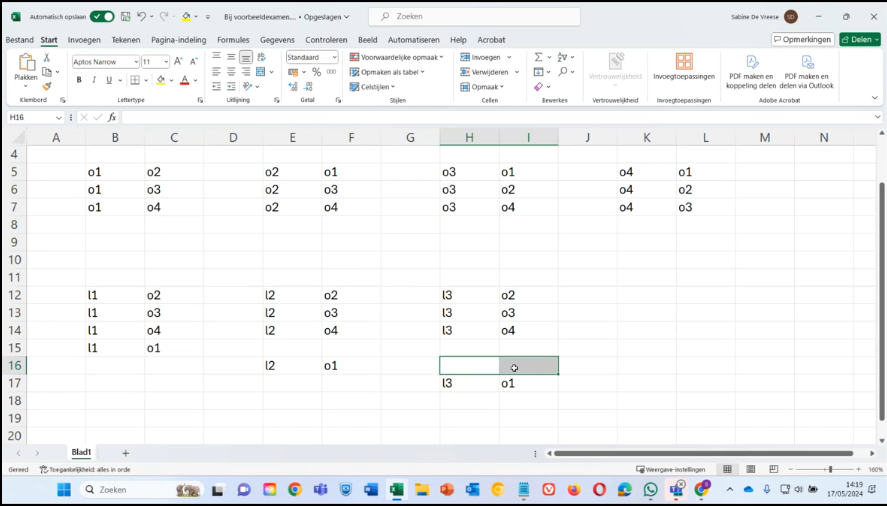

12/24
met logica
3/6= 1/2 drie van de zes nog mogelijk

Andere oplossing voor deze kansberekening is de simulatie




In [ ]:
basket = ["o","o","o","o","l","l","l"]

probs=[]
for i in range(1000000):
  probs.append(random.sample(basket,2))


## Question 4

The diameter of pistons produced in a factory are _D_ cm where _D_ ~ Nor(13.4, 0.12)

(1) The tolerance specified for the pistons is that the diameter needs to be at least 13.35 cm and not more than 13.5 cm. What proportion of the production in the factory meets these tolerance limits?  
(2) Three pistons are chosen at random. What is the probability that none of them meet the tolerance limits  
(3) A sample of 20 pistons is taken at random. The mean value for the diameter is found to be 13.43 cm. Test at the 5% significance level whether any modifications have been made to the machine producing the pistons.
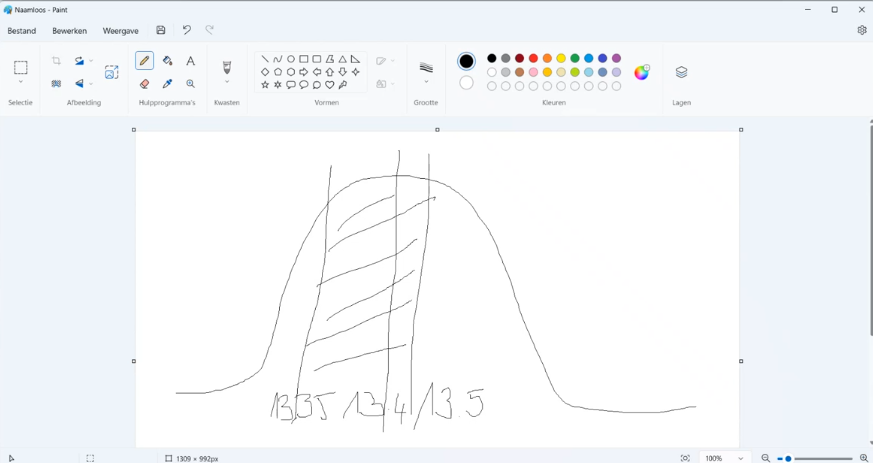


pdf om je plot te maken

cdf is alles aan de linkerkant

sf alles aan de rechterkant

isf is voor percentage (80 %) welk getal komt overeen met 80 %

Dus hier de cdf van 13.5 - de cdf van 13.35
linkerkant van 13.5 - de linkerkant van 13.35


In [ ]:
# Hoodfdstuk rechter demo-3.01-probability
# vraag 1

mu = 13.4
sigma = 0.12
p = stats.norm.cdf(13.5, loc = mu,scale=sigma) - stats.norm.cdf(13.35, loc = mu,scale=sigma)
print(p)


0.4592104995256687


In [ ]:
# vraag 2
# stel de vraag wat is de kans dat 1 niet in tolerantie limiet zit
# p = de kans dat die er tussen zit
# (1-p) = de kans dat we ene pakken en die zit er niet bijzit
# nu van 2 = (1-p)**2
# nu van 3 = (1-p)*(1-p)*(1-p)=(1-p)**3
# de kans dat 1 er niet tussen l1gt *de kans dat 1 er niet tussen l1gt *de kans dat 1 er niet tussen l1gt
print ((1-p)**3)



0.15815566527086766


In [3]:
#vraag 3
# hoofdstuk ? 3.03 Hypothesis testing Module 3.03 - Statistical Hypothesis testing
# Z of T test
# De onderliggende distributie is normaal verdeeld, dus een Z test mag
#   right tailed Z-Test

# Stap 1 :
# H0 er zijn geen wijzigingen aangebracht aan de machine
# H1 Er zijn wel wijzigingen aangebracht aan de machine , het gemiddelde is groter dan 13

# stap 2 significance level is gegeven
alpha = 0.05

# step 3 -de waarde van de test statistiek xoverstreept = 13.43

#step 4
mu = 13.4
sigma = 0.12
n=20
m_sample = 13.43

alpha = 0.05 # Significance level chosen by the researcher
p = stats.norm.sf(m_sample, loc=mu, scale=sigma/np.sqrt(n))

print("p-value: %.5f" % p)
if(p < alpha):
    print("p < alpha: reject H0")
else:
    print("p > alpha: do not reject H0")




p-value: 0.13178
p > alpha: do not reject H0


In [4]:
# Critical value according to the formula:
#    g = mu + stats.norm.isf(alpha) * sigma / np.sqrt(n)
# Making use of the loc/scale parameters of isf:
g = stats.norm.isf(alpha, loc=mu, scale=sigma / np.sqrt(n))
print("Critical value g ≃ %.3f" % g)
if (m_sample < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (m_sample, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (m_sample, g))

Critical value g ≃ 13.444
sample mean = 13.430 < g = 13.444: do not reject H0


## Answers Question 4

...

In [ ]:
Er zijn geen wijzigigen aangebracht aan de machine

## Question 5

The number of employees on the payroll at a food processing company is recorded at the beginning of each month.
These data are given below.

1. Give the data types of both columns
2. Convert the 'date' column to datetime type. Even if this fails you can continue working.
3. Create the following plot.

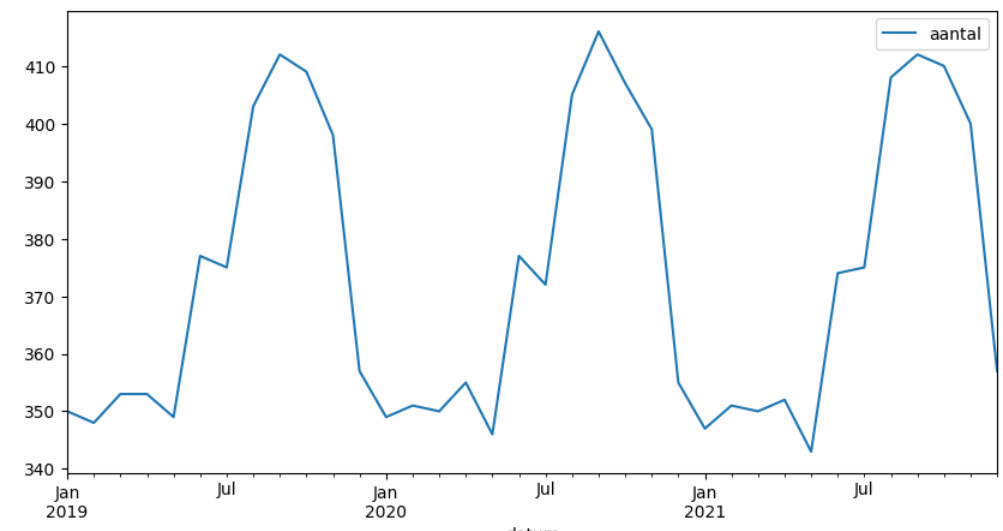

4. Make a forecast for the first four months of the next year using the most appropriate method. Explain why you chose this method.
5. Make a plot including the forecast.
6. Make the following calculations
- 6.1 Calculate the average number of employees in 2020
- 6.2 How many months did the company have more than 400 employees?




In [6]:
dfemployees = pd.DataFrame(data={
    'recording_date': ['2019/01/01', '2019/02/01', '2019/03/01', '2019/04/01', '2019/05/01', '2019/06/01', '2019/07/01', '2019/08/01', '2019/09/01', '2019/10/01', '2019/11/01', '2019/12/01', '2020/01/01', '2020/02/01', '2020/03/01', '2020/04/01', '2020/05/01', '2020/06/01', '2020/07/01', '2020/08/01', '2020/09/01', '2020/10/01', '2020/11/01', '2020/12/01', '2021/01/01', '2021/02/01', '2021/03/01', '2021/04/01', '2021/05/01', '2021/06/01', '2021/07/01', '2021/08/01', '2021/09/01', '2021/10/01', '2021/11/01', '2021/12/01'],
    'number': [350,348,353,353,349,377,375,403,412,409,398,357,349,351,350,355,346,377,372,405,416,407,399,355,347,351,350,352,343,374,375,408,412,410,400,357]
})
# hoofdstuk 7 tijdseries

dfemployees.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   recording_date  36 non-null     object
 1   number          36 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 704.0+ bytes


In [7]:
dfemployees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   recording_date  36 non-null     object
 1   number          36 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 704.0+ bytes


In [9]:
dfemployees.dtypes

recording_date    object
number             int64
dtype: object

dfemployees[''] =

In [13]:
dfemployees['recording_date']=pd.to_datetime(dfemployees['recording_date'])
dfemployees=dfemployees.set_index('recording_date')
dfemployees.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2019-01-01 to 2021-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   number  36 non-null     int64
dtypes: int64(1)
memory usage: 576.0 bytes


In [14]:
dfemployees.head()

,number
recording_date,
2019-01-01,350
2019-02-01,348
2019-03-01,353
2019-04-01,353
2019-05-01,349


<Axes: xlabel='recording_date'>

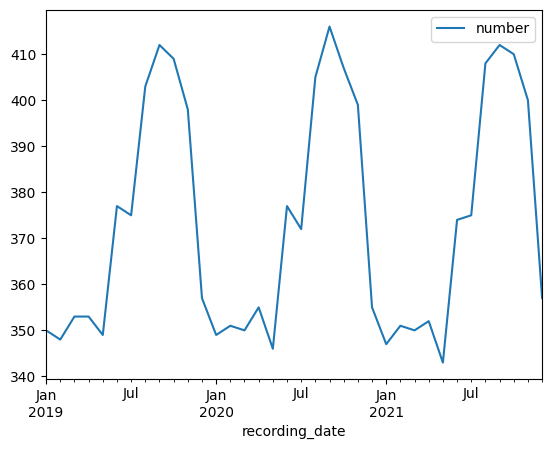

In [15]:
dfemployees.plot(y='number')

Text(0.5, 1.0, 'Train, test, fitted & predicted values using Holt-Winters')

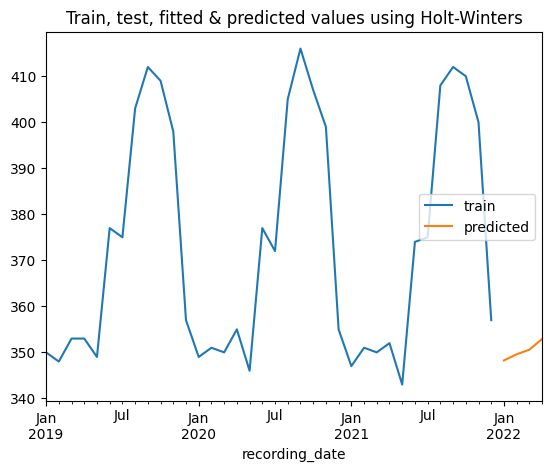

In [17]:
# triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train = dfemployees['number']

employee_hw = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12, freq='MS').fit()
# trend is additief ( a line); seasonal 'add'  of 'multiplicative', periode = 12 month a year , MS = months
wounded_predicted = employee_hw.forecast(4) # for next 12 month forecast

train.plot(legend=True, label='train')

wounded_predicted.plot(legend=True, label='predicted')

plt.title('Train, test, fitted & predicted values using Holt-Winters')

6.1 Calculate the average number of employees in 2020

6.2 How many months did the company have more than 400 employees?


In [18]:
# datum is index , dus je kn slicing doen
dfemployees['2020-01-01':'2020-12-31'].mean()


number    373.5
dtype: float64

In [19]:
dfemployees[dfemployees['number'] > 400].count()

number    9
dtype: int64

## Question 6

The sample given below contains measurement results of a variable Temperature at two time points (`time1` and `time2`). We want to know whether the measurements at the second time point are significantly different from those at the first time point.

Use an appropriate statistical test (with significance level 5%) to verify this statement.

1. Visualise the data with an appropriate plot. What can you infer about the research question? Explain.
2. What statistical test should you use to answer this research question? Be as specific as possible!
3. Formulate the null hypothesis and the alternative hypothesis.
4. Calculate the p-value.
5. Draw a conclusion based on the previous step and formulate an answer to the research question.
6. Give for the observations at time `time1`:
    1. The interquartile range
    2. The kurtosis
    3. The range
    4. The standard deviation

In [ ]:
# Hoofdstuk 5.
#2 sample T test
# 2 verschillende T1 en T2
# paired '' is dezelfde variabele




In [20]:
temperatures = pd.DataFrame(data={
  'time1': [65, 87, 59, 71, 58, 74, 55, 98, 62, 53, 84, 63, 78, 62, 60],
  'time2': [82, 91, 86, 83, 85, 51, 65, 61, 76, 65, 53, 70, 51, 55, 68]
})

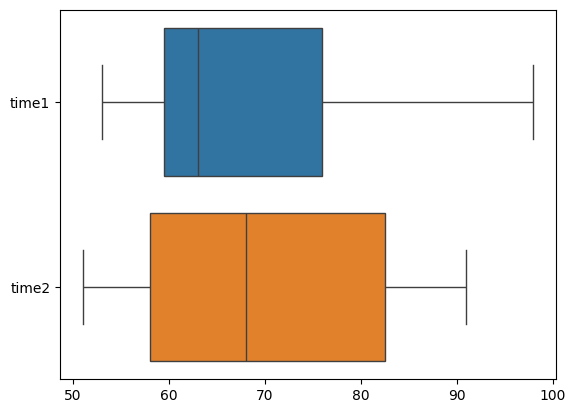

In [22]:
sns.boxplot(
    data=pd.DataFrame({'time1': temperatures['time1'], 'time2': temperatures['time2']}),
    orient='h');

nog geen significant verschil te zien

In [25]:
# Paired t-test with ttest_rel()
s,p=stats.ttest_rel(temperatures['time1'], temperatures['time2'], alternative='less') #kijk naar de boxplot naar gemiddeld, t1 gemiddelde is kleiner dus kies less anders greater

In [26]:
p

0.43719974299972214

HO = er is geen significant verschil

H1 = er is wel een significant verschil (groter)
  

In [ ]:
#conclusie
# p > 0.05 ==> er is geen aanleiding om H0 te verwerpen
#Er is geen significant verschil tss de waardes op t1 en t2

In [28]:
# Hoofsstuk 2 voor kwartiele enz
print(f"Kurtosis:            {temperatures['time1'].kurtosis()}")

# Median & co
print(f"Minimum:   {temperatures['time1'].min()}")
print(f"Median:    {temperatures['time1'].median()}")
print(f"Maximum:   {temperatures['time1'].max()}")
percentiles = [0.0, 0.25, 0.5, 0.75, 1.0]
print("Percentiles", percentiles, "\n", temperatures['time1'].quantile(percentiles))
print("Inter Quartile Range:",temperatures['time1'].quantile(.75) - temperatures['time1'].quantile(.25))
print(f"Range :    {temperatures['time1'].max() - temperatures['time1'].min()}")

Kurtosis:            0.15796776764037945
Minimum:   53
Median:    63.0
Maximum:   98
Percentiles [0.0, 0.25, 0.5, 0.75, 1.0] 
 0.00    53.0
0.25    59.5
0.50    63.0
0.75    76.0
1.00    98.0
Name: time1, dtype: float64
Inter Quartile Range: 16.5
Range :    45


## Answers Question 6


1.
2.
3.
4.
5.
6.
   1.
   2.
   3.
   4.

## Question 7

The figure below shows a graph of a time series.  The observations are plotted in black with a solid line. In addition, three forms of moving average are plotted.

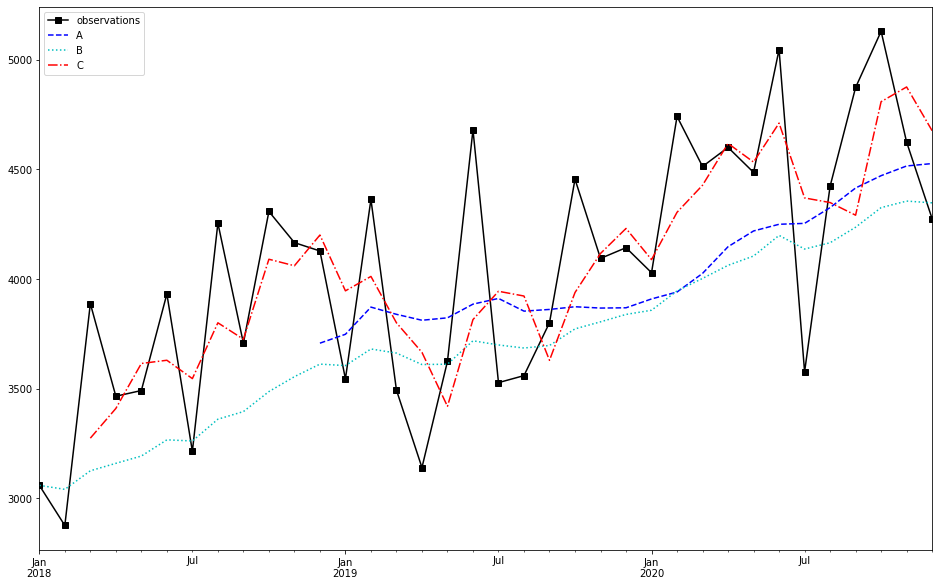

For each (A, B, C), indicate exactly what form of moving average is involved. Choose from the options given below:

- Simple moving average with period 3
- Simple moving average with period 12
- Simple exponential smoothing with $alpha = 0.1$
- Simple exponential smoothing with $alpha = 0.9$

If you had to set up a model for this time series based on exponential smoothing, which one would you use? Explain shortly your answer.

## Answers question 7

1. A (purple, Simple moving average with period 12): want begint pas na 12 maand
2. B (cyan, .Simple exponential smoothing with  alpha=0.1): volgt het minst de werkelijkheid dus alpha0.1
3. C (red, -Simple moving average with period 3.): want begit pas op maand 3 en volgt redelijk
4. The most appropriate form of exponential smoothing is .double.. because .no seasoning but yes to tend


## Question 8

Given last year's mileage and maintenance costs of 23 trucks.

(1) Make the plot below (In the Answers, give the command for this plot)

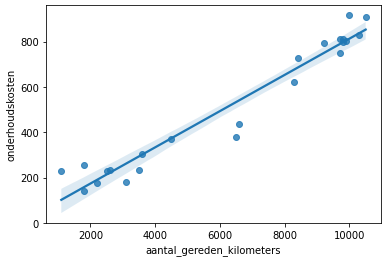

(2) Give the equation of the line   
(3) Calculate the correlation coefficient (symbol + value)  
(4) Formulate an interpretation for the value of the correlation coefficient  
(5) Approximately how much will be the maintenance cost of a truck driving 5000 kilometres.  
(6) What will be the approximate fixed cost of a truck even if it has not driven a single kilometre?  



In [32]:
sample_data = pd.DataFrame(data = {
    'mileage': [10500, 9700, 9200, 8300, 6500, 4500, 3500, 2200, 1800, 9800, 6600, 3600, 2500, 3100, 8400, 9700, 1800, 10000, 9800, 9900, 1100, 2600, 10300],
    'maintenance costs': [908.56, 751.12, 793.55, 619.61, 380.11, 368.72, 235.32, 174.93, 256.30, 799.58, 436.04, 304.25, 226.81, 179.68, 726.65, 810.53, 142.53, 915.53, 812.45, 803.78, 227.32, 231.46, 829.21]})

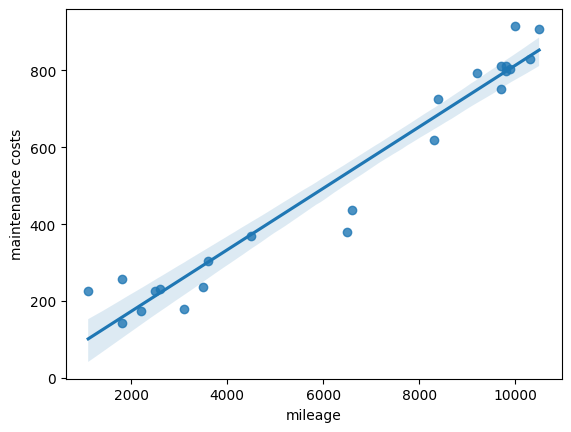

In [34]:
# h 6 regression
sns.regplot(data=sample_data, x='mileage', y='maintenance costs');

In [36]:
from sklearn.linear_model import LinearRegression

x = sample_data['mileage'].values.reshape(-1,1)
y = sample_data['maintenance costs']

model = LinearRegression().fit(x, y)

print(f"Regression line: ŷ = {model.intercept_:.4f} + {model.coef_[0]:.4f} x")

Regression line: ŷ = 13.7743 + 0.0799 x


In [37]:
x = sample_data['mileage']
y = sample_data['maintenance costs']
a,b = np.polyfit(x,y,1)
print(f"y= {a} *x + {b}")

y= 0.07989843131805248 *x + 13.774264624137674


In [38]:
cor = np.corrcoef(
    sample_data['mileage'],
    sample_data['maintenance costs'])[0][1]
print(f"R ≈ {cor:.4f}")

R ≈ 0.9735


In [41]:
sample_data.corr().iloc[0,1]

0.9734957380089202

In [ ]:
#Stijgend want is positief ( de slope)
# sterk verband want cor is dicht bij 1



In [45]:
# Approximately how much will be the maintenance cost of a truck driving 5000 kilometres.
print(f"kost = {a * 5000+ b}")

kost = 413.26642121440005


In [46]:
# Approximately how much will be the maintenance cost of a truck driving 0 kilometres.
print(f"kost = {a * 0+ b}")

kost = 13.774264624137674


## Answers Question 8


1.
2.
3.
4.
5.


## Question 9

You recently offered samples of three products to every customer who entered your business. You then asked which product customers liked best. You recorded these preferences for Product A, Product B and Product C in the dataset given below.

Do customers have a distinct preference for any of these products? Use an appropriate statistical test (with significance level 5%) to verify this statement.

1. Visualise the data with an appropriate plot. What can you infer about the research question? Explain.
2. What hypothesis test will you apply to answer this research question? Be as specific as possible!
3. Formulate the null hypothesis and the alternative hypothesis
4. Calculate the appropriate test statistic (test statistic) for this test. Give the symbol and value
5. Calculate the p-value
6. Draw a conclusion based on the previous step and formulate an answer to the research question.

In [30]:
products = pd.DataFrame(data={'Choice': [
  "Product A","Product A","Product B","Product B","Product C",
  "Product B","Product B","Product B","Product C","Product B",
  "Product C","Product A","Product C","Product B","Product C",
  "Product B","Product C","Product C","Product C","Product B",
  "Product C","Product C","Product B","Product C","Product B",
  "Product B","Product B","Product B","Product A","Product B",
  "Product B","Product B","Product B","Product B","Product C",
  "Product C","Product B","Product C","Product C","Product A",
  "Product C","Product C","Product B","Product B","Product B",
  "Product B","Product C","Product C","Product C","Product C",
  "Product C","Product B","Product A","Product C","Product C",
  "Product B","Product B","Product C","Product C","Product C",
  "Product B","Product C","Product B","Product B","Product C",
  "Product B","Product B","Product C","Product C","Product B",
  "Product C","Product C","Product C","Product B","Product B",
  "Product C","Product C","Product C","Product C","Product C",
  "Product C","Product C","Product C","Product C","Product C",
  "Product C","Product C","Product C","Product C","Product B"
]})
products.head()

,Choice
0,Product A
1,Product A
2,Product B
3,Product B
4,Product C


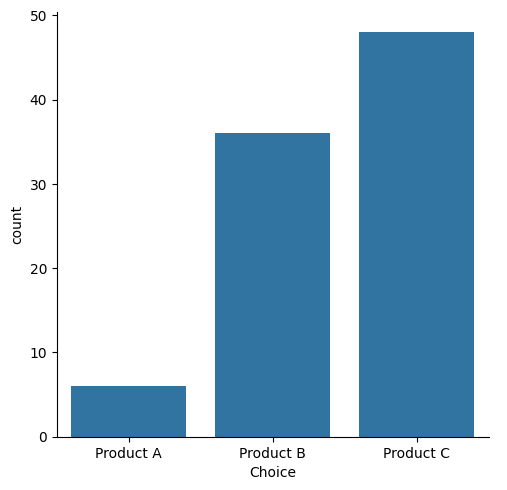

In [47]:
sns.catplot(data=products, x='Choice', kind='count');

## Answers Question 9


1.
2.
3.
4.
5.
6.

In [55]:
# we gaan de goodness of fit test gebruiken, komt de vzerdeling overeen met 33-33-33 procent ? is het gelijk verdeeld
# H0 : de drie producten ijn gelijk verdeels
# H1 de drieproducten zijn niet alledrie even populair

types =['PoductA', 'PoductB', 'PoductC']
observed =   products.value_counts()
expected_p = np.array([   1/3,      1/3,     1/3])




alpha = 0.05               # Significance level
n = sum(observed)          # Sample size
k = len(observed)          # Number of categories
dof = k - 1                # Degrees of freedom
expected = expected_p * n  # Expected absolute frequencies in the sample
g = stats.chi2.isf(alpha, df=dof)  # Critical value

# Goodness-of-fit-test in Python:
chi2, p = stats.chisquare(f_obs=observed, f_exp=expected)

print("Significance level  ⍺ = %.2f" % alpha)
print("Sample size         n = %d" % n)
print("k = %d; df = %d" % (k, dof))
print("Chi-squared        χ² = %.4f" % chi2)
print("Critical value      g = %.4f" % g)
print("p-value             p = %.4f" % p)


Significance level  ⍺ = 0.05
Sample size         n = 90
k = 3; df = 2
Chi-squared        χ² = 31.2000
Critical value      g = 5.9915
p-value             p = 0.0000


In [ ]:
# p value < 0.05 dus er is voldoende aanwijzing om de H0 te verwerpen
# de drie producten zijn niet alle 3 even populair
# bij de gebruikers

In [52]:
products.value_counts()

Choice   
Product C    48
Product B    36
Product A     6
Name: count, dtype: int64